In [31]:
import numpy as np
from math import factorial
import matplotlib.pyplot as plt
# задані точки
x = np.array ([0.115, 0.12, 0.125, 0.13, 0.135, 0.14, 0.145, 0.15, 0.155, 0.16, 0.165])
y = np.array([8.6572, 8.2932, 7.9582, 7.6489, 7.3623, 7.0961, 6.8491, 6.6185, 6.3998, 6.1965, 6.0055])
# перша інтерполяційна формула 
def first_interpolation(x, y, x0):
    n = len(x)
    f = np.zeros((n, n))
    f[:, 0] = y
    for j in range(1, n):
        for i in range(n - j):
            f[i, j] = (f[i+1, j-1] - f[i, j-1]) / (x[i+j] - x[i])
    ans = 0
    for j in range(n):
        prod = f[0, j]
        for i in range(j):
            prod *= (x0 - x[i])
        ans += prod
        
    return ans

# друга інтерполяційна формула
def second_interpolation(x, y, x0):
    n = len(x)
    f = np.zeros((n, n))
    f[:, 0] = y
    for j in range(1, n):
        for i in range(n - j):
            f[i, j] = (f[i+1, j-1] - f[i, j-1]) / (x[i+j] - x[i])
    ans = f[0, 0]
    for j in range(1, n):
        prod = f[0, j]
        for i in range(j):
            prod *= (x0 - x[i])
        ans += prod
    return ans

x1 = np.array([0.122, 0.129, 0.117])
x2 = np.array([0.146, 0.157, 0.167])
print("Першa інтерполяційна формула : ")
for i in range(len(x1)):
    y1 = first_interpolation(x, y, x1[i])
    print(f"f({x1[i]}) = {y1}")
print("Другa інтерполяційна формула : ")
for i in range(len(x2)):
    y2 = second_interpolation(x, y, x2[i])
    print(f"f({x2[i]}) = {y2}")


Першa інтерполяційна формула : 
f(0.122) = 8.155902991960064
f(0.129) = 7.708851141871617
f(0.117) = 8.508015282980868
Другa інтерполяційна формула : 
f(0.146) = 6.8018212233973765
f(0.157) = 6.315988396478462
f(0.167) = 5.905447460132826


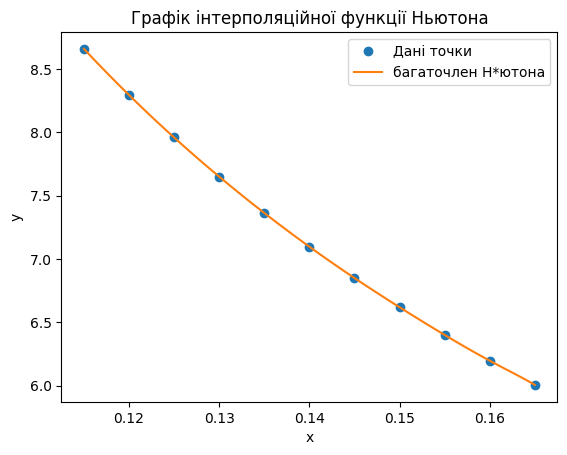

In [32]:
# будуємо графік інтерполяційної функції
xx = np.linspace(np.min(x), np.max(x), 100)
yy = np.zeros_like(xx)
for i in range(len(xx)):
    yy[i] = second_interpolation(x, y, xx[i])
plt.plot(x, y, 'o', label='Дані точки')
plt.plot(xx, yy, label='багаточлен Н*ютона')
plt.title("Графік інтерполяційної функції Ньютона")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
